In [371]:
import torch
from RegularizingEmbeddings.regularization import TanglingRegularization
from RegularizingEmbeddings.data.data_generation import make_trajectories, postprocess_data
import hydra
from hydra.core.global_hydra import GlobalHydra
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [372]:
# Initialize Hydra if it hasn't been already
if not GlobalHydra().is_initialized():
    hydra.initialize(config_path="conf", version_base=None)

# Now load the config
config = hydra.compose(config_name="config")


## Knot figure

torch.Size([1, 500, 2])


(<Figure size 640x480 with 1 Axes>, <Axes: >)

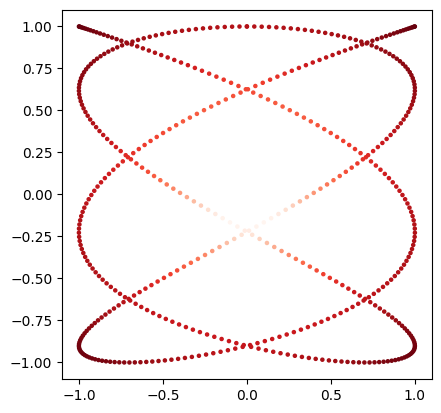

In [373]:


def visualize_figure_of_8(values, metric=None, s=5  ):
    if metric is None:
        metric = np.linalg.norm(values, axis=-1)
    f, ax = plt.subplots(1, 1)
    ax.scatter(values[:, :, 0], values[:, :, 1], c=metric, cmap='Reds', s=s, norm=LogNorm())
    ax.set_aspect('equal')
    return f, ax


T = 500
time = np.linspace(0, 2*np.pi, T)
dT = np.diff(time)[0]


# figure of 8 2D trajectory
x = np.sin(7*time)
y = np.cos(4*time)

values = np.stack([x, y], axis=-1)

values = torch.tensor(values).unsqueeze(0)
print(values.shape)

visualize_figure_of_8(values)

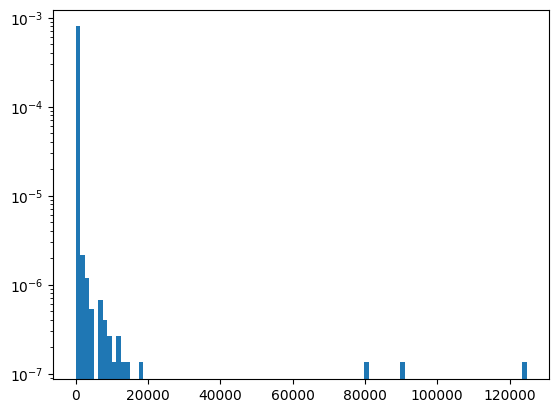

torch.Size([5, 2399])

In [380]:
reg = TanglingRegularization(mode='efficient', dT=dT)
Q = reg(values)

plt.hist(Q.flatten().numpy(), bins=100, density=True, log=True)
plt.show()

Q.shape



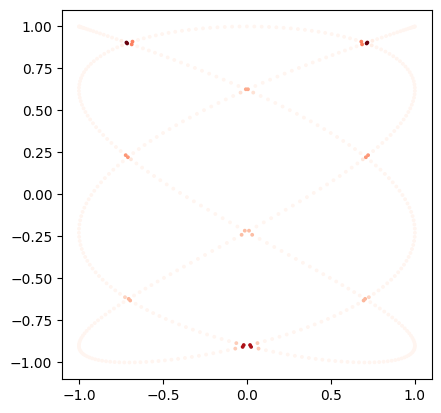

In [375]:
f, ax = visualize_figure_of_8(values[:, 1:, :], metric=Q, s=3)
# ax.set(xlim=[-0.25, 0.25], ylim=[-1, -0.25])

(<Figure size 640x480 with 1 Axes>, <Axes: >)

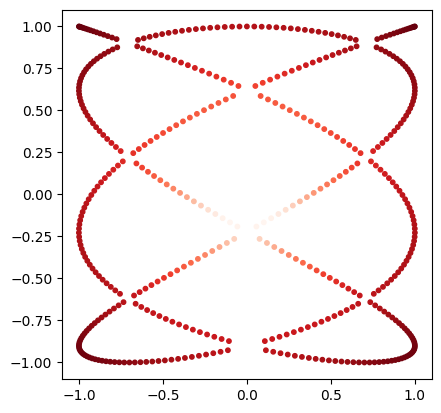

In [376]:
mask = Q[0] <= 0.11 * 1e6

visualize_figure_of_8(values[:, 1:, :][:, mask, :], s=10)

## Lorenz

In [398]:

eq, sol, dt = make_trajectories(config)
values = postprocess_data(config, sol)

# subset of batches
values = values[:1, :, [0, 2]]
values = torch.tensor(values)
print(values.shape)

torch.Size([1, 2400, 2])


torch.Size([1, 2399])


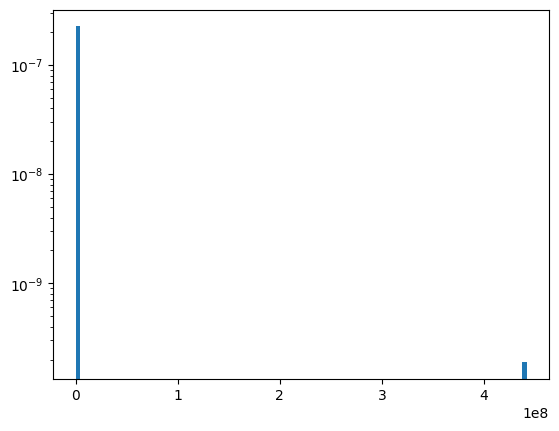

In [399]:
reg = TanglingRegularization(mode='efficient', dT=dt)
Q = reg(values)
print(Q.shape)
plt.hist(Q.flatten().numpy(), bins=100, density=True, log=True)
plt.show()



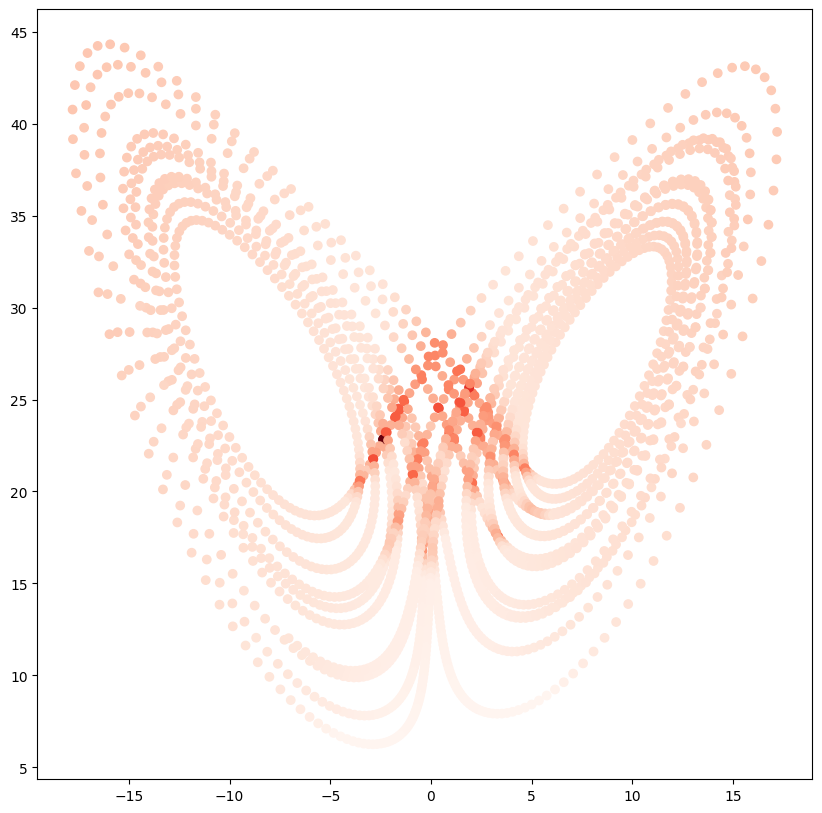

In [400]:
from matplotlib.colors import LogNorm


def plot_lorenz(values, Q):
    f = plt.figure(figsize=(10, 10))
    # ax = f.add_subplot(111, projection='3d')

    # for b in range(values.shape[0]):
    #     ax.scatter(values[b, :, 0], values[b, :, 1], values[b, :, 2], 
    #            c=Q[b].numpy(), cmap='Reds', norm=LogNorm())
    
    ax = plt.axes()
    for b in range(values.shape[0]):
        ax.scatter(values[b, :, 0], values[b, :, 1], c=Q[b].numpy(), cmap='Reds', norm=LogNorm())

th = 1000
# b = 2
# mask = Q[b, :] <= th
plot_lorenz(values[:, 1:, :], Q[:, :])
